In [ ]:
#Classification of CIFAR-10 dataset

In [ ]:
# Import Required Libraries
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define Paths and Parameters
dataset_path = '/content/drive/MyDrive/MiniProject Weed Detection/Using dataset-1/dataset1'  # Adjust this path
base_dir = '/content/dataset'
# base_dir = '/content/dataset/train'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
img_width, img_height = 150, 150
batch_size = 32
epochs = 50
split_size = 0.2

In [ ]:
# Function to split data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    for category in os.listdir(SOURCE):
        category_path = os.path.join(SOURCE, category)
        files = os.listdir(category_path)
        files = [os.path.join(category_path, f) for f in files]
        train_files, test_files = train_test_split(files, test_size=SPLIT_SIZE, random_state=30)

        train_category_path = os.path.join(TRAINING, category)
        test_category_path = os.path.join(TESTING, category)

        os.makedirs(train_category_path, exist_ok=True)
        os.makedirs(test_category_path, exist_ok=True)

        for f in train_files:
            shutil.copy(f, train_category_path)
        for f in test_files:
            shutil.copy(f, test_category_path)

# Split the data
split_data(dataset_path, train_dir, test_dir, split_size)

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Training and testing data generators
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')

Found 1824 images belonging to 2 classes.
Found 682 images belonging to 2 classes.


In [ ]:
# Create training and testing directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:

# keras imports for the dataset and building our neural network
from keras.datasets import mnist

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
#from tensorflow.keras.utils import np_utils

In [ ]:
from keras.layers import Input
from keras.layers import Dense, Conv2D, Flatten
from keras.models import Model
#import tensorflow_addons as tfa
import tensorflow as tf
# Build the Feed-Forward Neural Network
model = Sequential([
    Flatten(input_shape=(img_width, img_height, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# Train the Model
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs, validation_data=test_generator, validation_steps=test_generator.samples // batch_size)

# Evaluate the Model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/50
57/57 [==============================] - 18s 289ms/step - loss: 3.2091 - accuracy: 0.7697 - val_loss: 1.4941 - val_accuracy: 0.8676
Epoch 2/50
57/57 [==============================] - 16s 287ms/step - loss: 0.5920 - accuracy: 0.8152 - val_loss: 0.6022 - val_accuracy: 0.8661
Epoch 3/50
57/57 [==============================] - 17s 291ms/step - loss: 0.8476 - accuracy: 0.7928 - val_loss: 0.8425 - val_accuracy: 0.8661
Epoch 4/50
57/57 [==============================] - 17s 294ms/step - loss: 0.5137 - accuracy: 0.8416 - val_loss: 0.3687 - val_accuracy: 0.8661
Epoch 5/50
57/57 [==============================] - 16s 281ms/step - loss: 0.5013 - accuracy: 0.8536 - val_loss: 0.5634 - val_accuracy: 0.8661
Epoch 6/50
57/57 [==============================] - 17s 291ms/step - loss: 0.5780 - accuracy: 0.8158 - val_loss: 0.3582 - val_accuracy: 0.8676
Epoch 7/50
57/57 [==============================] - 19s 333ms/step - loss: 0.4454 - accuracy: 0.8613 - val_loss: 0.7353 - val_accuracy: 0.5134

In [ ]:
import numpy as np
predictions = np.argmax(model.predict(test_generator),axis=1)
labels = test_generator.classes

22/22 [==============================] - 2s 86ms/step


In [ ]:
classes = []
for i in os.listdir(dataset_path):
    classes+=[i]

classes

['train_dir', 'test_dir']

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions, labels, target_names=classes))

              precision    recall  f1-score   support

   train_dir       1.00      0.13      0.24       682
    test_dir       0.00      0.00      0.00         0

    accuracy                           0.13       682
   macro avg       0.50      0.07      0.12       682
weighted avg       1.00      0.13      0.24       682



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
y_pred_proba = model.predict(test_generator)

22/22 [==============================] - 2s 102ms/step


In [ ]:
fpr, tpr, thresholds = roc_curve(labels, y_pred_proba)

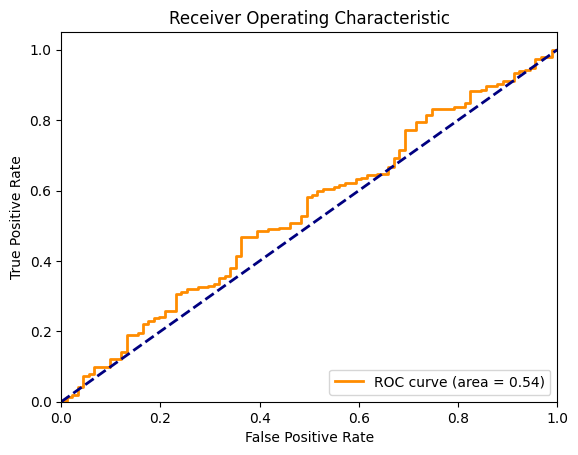

In [ ]:
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

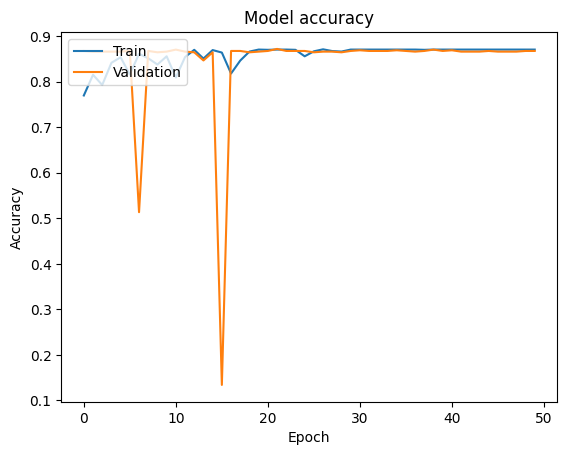

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()